# K-Nearest Neighbors

Classification is a type of supervised machine learning model. Classification algorithms are used to predict the discrete categories that samples in data belong to. These algorithms can fall under two types - Binary Classification & Multi-Classification. Below are examples for each type:
* Binary Classification - A model classifies emails as either "spam" or "not spam".
* Multi-Classification - A model classifies movies based on their description as "action", "adventure", "fantasy", "romance", "history", etc.

The K-Nearest Neighbors Algorithm basically works by memorizing the trained samples in your data, and then *classifying* new samples by looking at the *k* closest samples (neighbors). Consider the following image. On this plot, you have red samples, blue samples, and green samples. (Run the below script to show the image).

In [1]:
from IPython.display import Image
from IPython.core.display import HTML
Image(url="https://upload.wikimedia.org/wikipedia/commons/c/cc/Data3classes.png")

Notice clustering of similar colored data points around each other. In this example, there are certainly outliers. However a new sample plotted in the top left will **Most Likely** be a red point, and it will be classified as such using the K-Nearest Neighbors algorithm. When the algorithm chooses the classification of the new sample it will consider the *k* number of closest trained samples. Here are some of the effects of different *k* values:
* As we decrease the value of K to 1, our predictions become less stable. Just think for a minute, imagine K=1 and we have a query point surrounded by several reds and one green (I’m thinking about the top left corner of the colored plot above), but the green is the single nearest neighbor. Reasonably, we would think the query point is most likely red, but because K=1, KNN incorrectly predicts that the query point is green. - cited from [https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761](https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761)
* Inversely, as we increase the value of K, our predictions become more stable due to majority voting / averaging, and thus, more likely to make more accurate predictions (up to a certain point). Eventually, we begin to witness an increasing number of errors. It is at this point we know we have pushed the value of K too far. - cited from [https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761](https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761)
* In cases where we are taking a majority vote (e.g. picking the mode in a classification problem) among labels, we usually make K an odd number to have a tiebreaker. - cited from [https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761](https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761)

In this lesson, we will use the classification algorithm *k-nearest neighbors* to classify images of handwritten numbers as numeric digits (0-9). We will use data from the "digits" dataset to predict the distinct class to which a sample belongs. Some important notes for this lesson:
* You will need to have the library sklearn installed.
* This is an abbreviated version of the case study found in *Intro to Python for Computer Science and Data Science* by Paul & Harvey Deitel, pages 599-620 (15.2 & 15.3).

*****

## Loading the Dataset

First, we will load the dataset:

In [2]:
from sklearn.datasets import load_digits

digits = load_digits()

The "digits" dataset is a **Bunch** object, which is a subclass of **dict** that has additional attributes for interacting with the dataset. We will be using the `.DESCR` attribute to view a description of the dataset.

In [3]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

Lets note the \*\*Data Set Description\*\*. From this, we can determine that the original dataset has 5620 samples, each with 64 attributes ranging from 0..16, and no missing values.
* **This version of the dataset bundled with scikit-learn* contains only 1797 *testing samples*.** The complete dataset including the 3823 samples for training can be found at [https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits](https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits).
* The attribute values, 0..16, represent the intensity of each pixel. 
* After reviewing a few more attributes of the **Bunch** object, we will look at a sample in both an 8x8 array as well as the pixelated image.

The 1797 samples we will be looking at are broken up into two **Bunch** attributes - `digits.data` and `digits.target`. Let's explore each attribute:

In [4]:
digits.data.shape

(1797, 64)

From `digits.data.shape` we can determine that the the data includes 1797 rows (samples) and 64 columns (features).

We will pick the 759th samples and examine it.

In [5]:
digits.data[758]

array([ 0.,  0.,  0.,  8., 14., 15.,  7.,  0.,  0.,  0.,  4., 16., 12.,
       15., 14.,  0.,  0.,  0.,  1.,  1.,  0., 11., 12.,  0.,  0.,  0.,
        2.,  4.,  6., 14., 15.,  0.,  0.,  4., 16., 16., 16., 16.,  5.,
        0.,  0.,  8., 12.,  7., 14., 12.,  0.,  0.,  0.,  0.,  0.,  4.,
       16.,  3.,  0.,  0.,  0.,  0.,  0., 11.,  7.,  0.,  0.,  0.])

As you can see, the sample is an array of 64 values (each one being a feature).

Let's do the same thing for `digits.target`.

In [6]:
digits.target.shape

(1797,)

In [7]:
digits.target[758]

7

The *target* data is an array of 1797 single samples, each with a value that represents the target digit we are trying to classify. The 759th sample is supposed to be the digit **7**.

Above, we saw the 759th sample's features in a 1x64 array. The **Bunch** attribute `.images` allows us to see each sample in an 8x8 array format. We will also show the sample in pixelated image form using matplotlib.

First, we will view one sample in array form:

In [8]:
digits.images[758]

array([[ 0.,  0.,  0.,  8., 14., 15.,  7.,  0.],
       [ 0.,  0.,  4., 16., 12., 15., 14.,  0.],
       [ 0.,  0.,  1.,  1.,  0., 11., 12.,  0.],
       [ 0.,  0.,  2.,  4.,  6., 14., 15.,  0.],
       [ 0.,  4., 16., 16., 16., 16.,  5.,  0.],
       [ 0.,  8., 12.,  7., 14., 12.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  0., 11.,  7.,  0.,  0.,  0.]])

Now lets use matplotlib to view the image:

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

* Simply

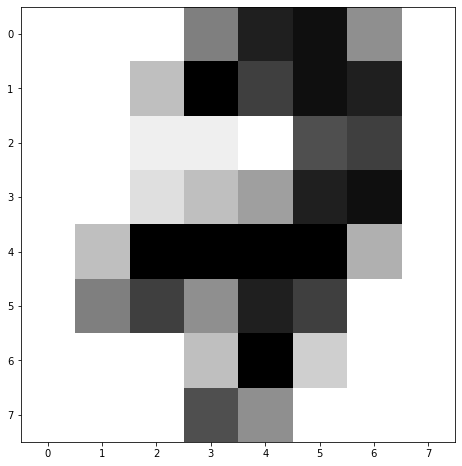

In [10]:
fig = plt.figure(figsize=(8,8))
plt.imshow(digits.images[758], cmap=plt.cm.gray_r)

* Or with some formatting

Text(0.5, 1.0, '7')

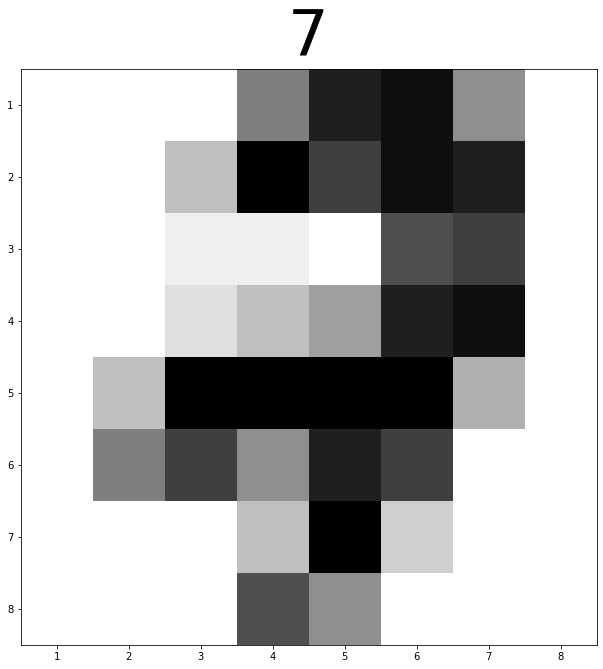

In [11]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0, 0, 1, 1])
plt.imshow(digits.images[758], cmap=plt.cm.gray_r)
ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7])
ax.set_yticks([0, 1, 2, 3, 4, 5, 6, 7])
ax.set_xticklabels([1, 2, 3, 4, 5, 6, 7, 8])
ax.set_yticklabels([1, 2, 3, 4, 5, 6, 7, 8])
ax.set_title(digits.target[758], fontdict={'fontsize':64})

* And the first 24 samples

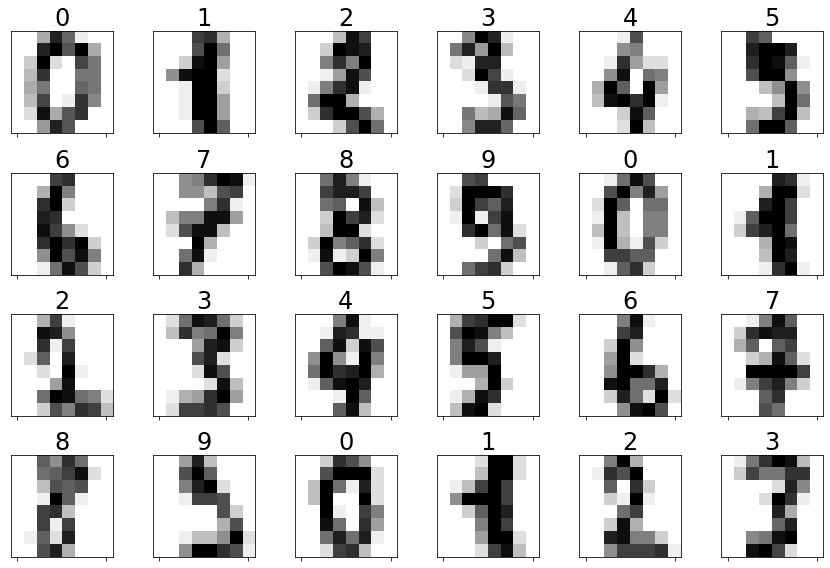

In [12]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(12,8))
for item in zip(axes.ravel(), digits.images[:24], digits.target[:24]):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([0,7])
    axes.set_xticklabels(["", ""])
    axes.set_yticks([])
    axes.set_title(target, fontdict={'fontsize':24})
plt.tight_layout()

Now that we've explored the dataset, let's begin creating the model.

*****

## Creating the Model

You typically train a machine-learning model with a subset of the data. We will be splitting the 1797 samples into 2 subsets - a training subset, and a testing subset. In theory, the more data you have for training, the better you can train your model.

We will be using the function **train_test_split** from the **sklearn.model_selection** to randomize and split the data into subsets. Let's import the function and use it to create our training and testing data.

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=11)

A few things to note abou the above line of code:
* By convention, uppercase X is used to represent the samples, and lowercase y is used to represent the target values:
* The function provides the keyword arguement `random_state` for *reproducibility*. Like the `seed` function when working with other modules and functions, this allows anyone following along with this lesson to get the same "random" results.
* By default, **train_test_split** reserves 75% of the data for training and 25% for testing. The keyword arguement `test_size` can be used to change the ratio of train vs. test data.

Now that we've split the data into training and testing subsets, let's use the **KNeighborsClassifier** estimator from **sklearn.neighbors** module to implement the *k-nearest neighbors* algorithm.

In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

To train the model:

In [15]:
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

The above output is the estimator's default settings. The **n_neighbors** value corresponds to *k* in the *k-nearest neighbors* algorithm. While all these settings can be used to fine-tune your model, this example will work well with the default settings. For a detailed explanation of the differents settings & parameters you can visit [http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).

We will now use the model to predict the target values of the test data subset. To do this, we will use the `.predict` function and insert the X values (or features) of the test data subset. We will then compare them with the expected results.

In [16]:
predicted = knn.predict(X=X_test)
expected = y_test

In [17]:
print('First 20 Predicted Values:', predicted[:20])
print('First 20 Expected Values: ', expected[:20])

First 20 Predicted Values: [0 4 9 9 3 1 4 1 5 0 4 9 4 1 5 3 3 8 5 6]
First 20 Expected Values:  [0 4 9 9 3 1 4 1 5 0 4 9 4 1 5 3 3 8 3 6]


We did pretty well! Out of the first 20 values, only 1 predicted value (at index 18) did not match the expected value. But this is only the firt 20 values (of 450 total test values), so lets find out how many errors there were in total.

In [18]:
error_count = 0
for (p, e) in zip(predicted, expected):
    if p != e:
        error_count += 1
error_count

10

We can also look at the specific errors and see if there are any patterns in the errors. For example, it may be plausible that a target value of 3 was more commonly mistaken for an 8 than other pairs of predicted & expected values.

In [19]:
for (p, e) in zip(predicted, expected):
    if p != e:
        print ([p, e])

[5, 3]
[8, 9]
[4, 9]
[7, 3]
[7, 4]
[2, 8]
[9, 8]
[3, 8]
[3, 8]
[1, 8]


Looking at the above errors, I don't see any blatant patterns. However in other data sets you may want to dive deeper into this analysis. In that case, I'd recommend using a confusion matrix. More information about confusion matrices and how they can be applied here can be found in *Intro to Python for Computer Science and Data Science* on pages 612-615.

*****

## Measuring Model Accuracy

Once you've trained and tested your model, you'll want to measure its accuracy. One way to do this is by looking at the estimator's **Score**. In this case, the **Score** represents the *prediction accuracy* of the test data.

The **Score** can be found by calling `.score` on the model.

In [20]:
print(f'{knn.score(X_test, y_test):.2%}')

97.78%


We can see that our model scored a 97.78% accuracy in predicting the target values.

Like I mentioned previously, another way of measuring your model is by using a confusion matrix. I won't be diving into that due to time constraints, but more information about confusion matrices and how they can be applied here can be found in *Intro to Python for Computer Science and Data Science* on pages 612-615.

*****

## K-Fold Cross-Validation

As we stated earlier, the more training data you have for your model, the better that model will be. *K-Fold Cross-Validation* enables you to use all of your data for *both* training *and* testing. This allows you to better understand how well your model will perform when making predictions with new data. *K-Fold* works by splitting the dataset into *k* equally sized **Folds**. For each fold you split the data into, you train a different model. Then you can measure the model by taking the mean score.

To better explain how the **Folds** work, I will explain the process as if we used 10 (*k*) folds.
* First, we'd train with folds 1-9, then test with fold 10.
* Next, we'd train with folds 1-8 and 10, then test with fold 9.
* Next, we'd train with folds 1-7 and 9-10, then test with fold 8.
* ...
* Lastly, we'd train with folds 2-10, then test with fold 1.

In [21]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, random_state=11, shuffle=True)

`n_splits` is *k* in this case (as in *k*-folds). `shuffle` will randomize the data, which is especially important in cases where your data may be sorted before it is modeled.

Next we will use the function `cross_val_score` to train and test our model.

In [22]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=knn, X=digits.data, y=digits.target, cv=kfold)

Please note, `knn` and `kfold` are objects that we have already created. This is testing a model we have already created - `knn`, using the cross-validation generator (`cv`) that we just created.

We can now view our scores, as well as take the mean accuracy and standard deviation of them.

In [23]:
scores

array([0.97777778, 0.99444444, 0.98888889, 0.97777778, 0.98888889,
       0.99444444, 0.97777778, 0.98882682, 1.        , 0.98324022])

In [24]:
print(f'Mean Accuracy: {scores.mean():.2%}')

Mean Accuracy: 98.72%


In [25]:
print(f'Accuracy Standard Deviation: {scores.std():.2%}')

Accuracy Standard Deviation: 0.75%


When we compare the model accuracy using *K-Fold Cross Validation* against our original **test_train_split** (75% training data, 25% testing data), we have achieved a higher accuracy! 98.72% vs. 97.78%

*****

## Hyperparameter Testing

The *k* (`n_neighbors`) in *K-Nearest Neighbors* is considered a hyperparameter. Some of the other's we saw earlier were `algorithm`, `leaf_size`, `metric`, `metric_params`, `n_jobs`, `p`, and `weights`. Typically in real-world machine learning studies, hyperparameters are used to fine-tune your model to produce the best possible predictions. We will test different values for *k* to determine which will produce the best results.

In [26]:
for k in range(1, 20, 2):
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(estimator=knn, X=digits.data, y=digits.target, cv=kfold)
    print(f'k={k}; mean accuracy={scores.mean():.2%}; standard deviation={scores.std():.2%}')

k=1; mean accuracy=98.83%; standard deviation=0.58%
k=3; mean accuracy=98.78%; standard deviation=0.78%
k=5; mean accuracy=98.72%; standard deviation=0.75%
k=7; mean accuracy=98.44%; standard deviation=0.96%
k=9; mean accuracy=98.39%; standard deviation=0.80%
k=11; mean accuracy=98.39%; standard deviation=0.80%
k=13; mean accuracy=97.89%; standard deviation=0.89%
k=15; mean accuracy=97.89%; standard deviation=1.02%
k=17; mean accuracy=97.50%; standard deviation=1.00%
k=19; mean accuracy=97.66%; standard deviation=0.96%


You'll notice that the lower *k* is, the more accurate our model is. You'll see a similar pattern with standard deviation - the greater *k* is, the higher the deviation. For this model, *k*=1 produces the most accurate results.

*****

## Homework

Now that we've learned how to use the K-Nearest Neighbors model using the "digits" dataset, let's try creating another model for the "iris" dataset. The dataset can be imported using the following code:

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()

First, I'd suggest exploaring the data using the `.DESCR` function. Determine the size of the dataset, as well as what the targets and features of each sample are. This dataset also has the `.target` and the `.data` attributes.

After you've explored the data, create a K-Nearest Neighbors model using either the `train_test_split` method or the `K-Fold Cross-Validation` method. If you are feeling ambitious, try to determine the best *k* value to use for your model - or fine tune any other hyperparameters.